In [10]:
from scipy import stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

>There are a few corrupted lines!

In [2]:
#The indent in the markdown above was made by prefixing a > on the line with text.
books = pd.read_csv('books.csv', skiprows=[4011, 5687, 7055, 10600, 10667])

In [4]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

<h1>H0: The ratings_count makes no difference to the average_rating. <h1>

<h5>Ha: It does, negatively! The higher the count, the lower the score!<h5>

In [25]:
r, p = stats.pearsonr(books.average_rating, books.ratings_count)

In [27]:
r

0.045573881116691264

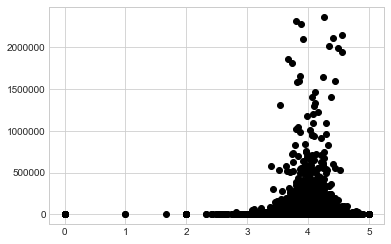

In [24]:
#There are two outliers that need to be cut. Those ones with the high review count.
plt.plot(books.average_rating, books.ratings_count, 'o', color='black');

In [17]:
books.ratings_count.sort_values(ascending=False).head()

2        5629932
12243    4367341
2000     2364968
1717     2318478
340      2279854
Name: ratings_count, dtype: int64

In [23]:
#harry potter is way too much of an outlier.
books = books[books.ratings_count<3067340]

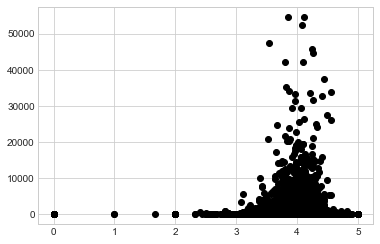

In [35]:
plt.plot(books.average_rating, books.text_reviews_count, 'o', color='black');

In [34]:
#People like to write text reviews of The Book Thief.
books = books[books.text_reviews_count<60000]

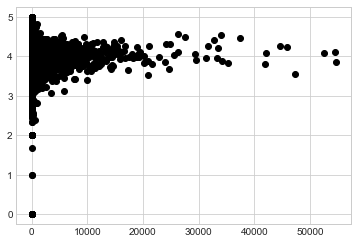

In [37]:
#Maybe I should only look at books that have above 2 stars. Nobody bothers to write text 
#reviews for books they hate.
plt.plot(books.text_reviews_count, books.average_rating, 'o', color='black');

In [38]:
books.average_rating.mean()

3.9305732623440814

In [41]:
#Lets only look at above average books!
super_books = books[books.average_rating > books.average_rating.mean()]

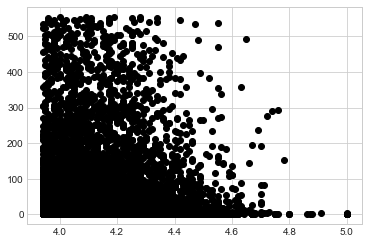

In [53]:
plt.plot(super_books.average_rating, super_books.text_reviews_count, 'o', color='black');

In [45]:
super_books.text_reviews_count.mean()

592.3123460169724

In [49]:
stats.iqr(super_books.text_reviews_count) * 1.5 + 227

555.5

In [47]:
#So anything that is above 328.5 above the .75 quantile is an outlier. So the theory goes.
super_books.quantile([0.25,0.5,0.75])

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
0.25,10481.50,4.02,9.780374e+12,198.25,99.0,8.0
0.50,19896.00,4.12,9.780671e+12,320.00,734.0,42.0
0.75,32511.75,4.25,9.781400e+12,467.00,5725.0,227.0


In [52]:
super_books = super_books[super_books.text_reviews_count<555.5]

Lets look elsewhere. 

`spam =5`